## Linear Phase



Let's try to visualize how a linear phase filter preserves the shape of the waveform in the time domain. 

We'll
1) Synthesize a signal from the combination of 2 sinusoids
2) Add noise to this signal to simulate a real world signal that needs filtering.
3) Pass the signal through an __IIR__ filter (non-linear phase) and see how the filter __changes__ the waveshape of the signal.
4) Pass the signal through an __FIR__ filter (linear-phase) and see how the filter __preserves__ the waveshape of the signal. 

##### Synthesize a test signal
Add 2 sinusoids with the following properties

|                           | 1    | 2    |
|---------------------------|------|------|
| Frequency (πrad/sample) | 0.2  | 0.4  |
| Amplitude (linear)        | 1.0  | 0.5  |
| Starting phase (rad)      | 0.0  | π/2 |

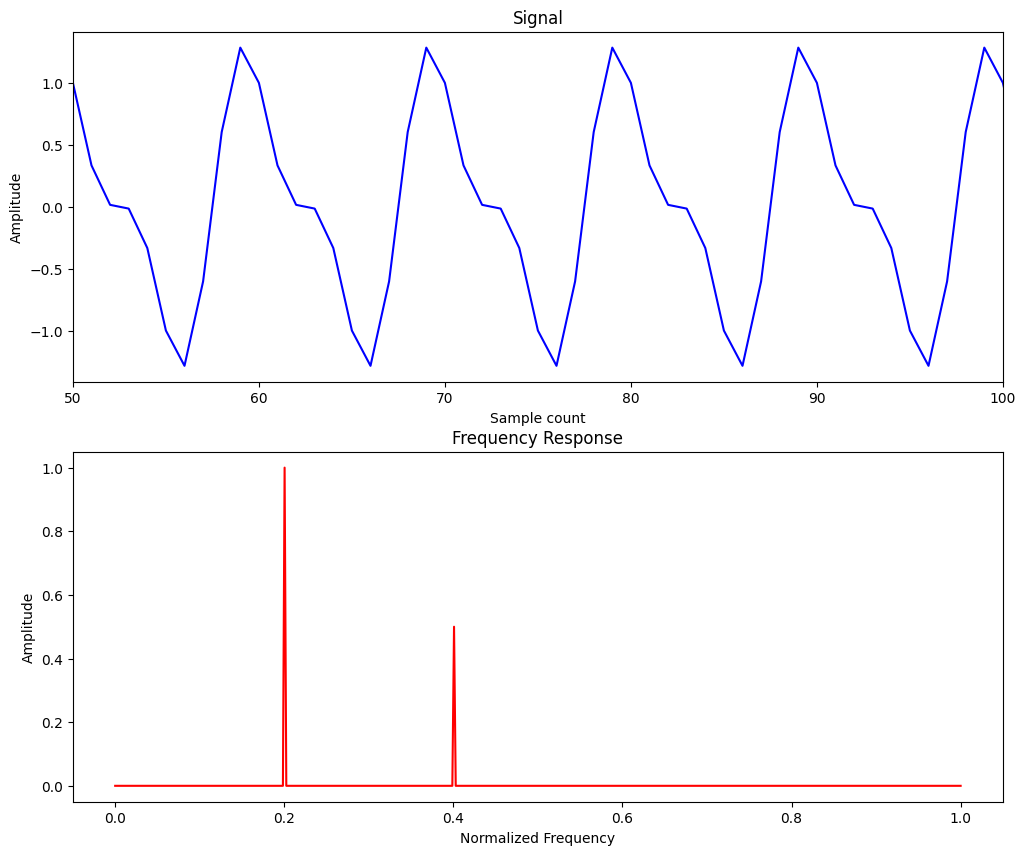

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

sampleRate = 100
length = 1000 
n = np.arange(length)
t = n / sampleRate

#Synthesize a signal
signal = np.cos(2*np.pi*10*t) + 0.5*np.cos(2*np.pi*20*t + np.pi/2)

fig, axes = plt.subplots(2, 1, figsize=(12,10))
ax = axes[0]
ax.plot(signal, 'b-')
ax.set_xlabel('Sample count')
ax.set_ylabel('Amplitude')
ax.set_title("Signal")
ax.set_xlim(50, 100)

# Generate the FFT spectrum to plot the frequency response
spectrum = fft(signal)

ax = axes[1]
x = np.linspace(0, 1, spectrum.size//2)
y = (np.abs(spectrum)/(spectrum.size/2))[:spectrum.size//2]    
ax.plot(x, y, 'r-')
ax.set_xlabel('Normalized Frequency')
ax.set_ylabel('Amplitude')
ax.set_title("Frequency Response")

plt.show()

##### Add noise to the signal

1) Synthesize a noise signal.
2) Use a bandpass filter to isolate a small band of frequencies such that the noise exists within the frequency range 0.28 π rad/sample to 0.33 π rad/sample.
3) Add the bandlimited noise signal to the test signal.

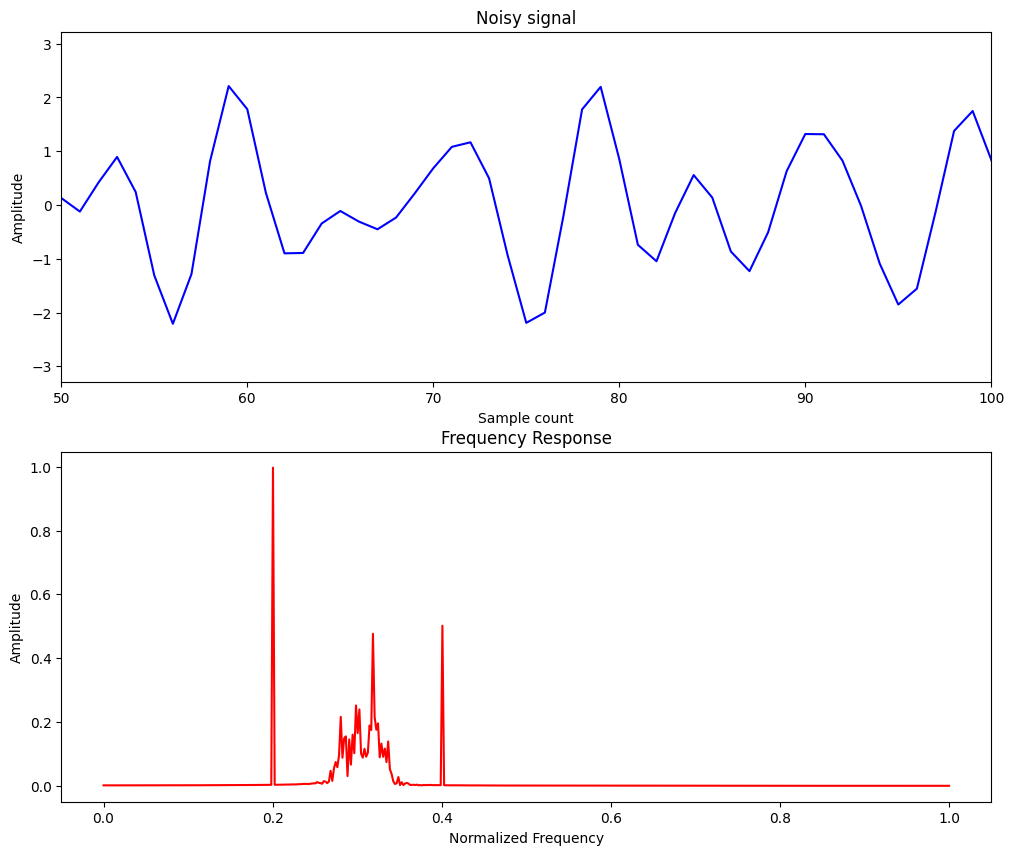

In [2]:
from scipy.signal import butter, lfilter
# Add some noise
noise = np.random.rand(len(signal)) * 10

# filter the noise to synthesise band limited noise
b, a = butter(5, [0.28, 0.33], 'bandpass')
noiseFiltered = lfilter(b, a, noise)

noisySignal = signal + noiseFiltered

fig, axes = plt.subplots(2, 1, figsize=(12,10))
ax = axes[0]
ax.plot(noisySignal, 'b-')
ax.set_xlabel('Sample count')
ax.set_ylabel('Amplitude')
ax.set_title("Noisy signal")
ax.set_xlim(50, 100)

# Generate the FFT spectrum to plot the frequency response
spectrum = fft(noisySignal)

ax = axes[1]
x = np.linspace(0, 1, spectrum.size//2)
y = (np.abs(spectrum)/(spectrum.size/2))[:spectrum.size//2]    
ax.plot(x, y, 'r-')
ax.set_xlabel('Normalized Frequency')
ax.set_ylabel('Amplitude')
ax.set_title("Frequency Response")

plt.show()

Compare the test signal and the test signal with noise, in the time domain.

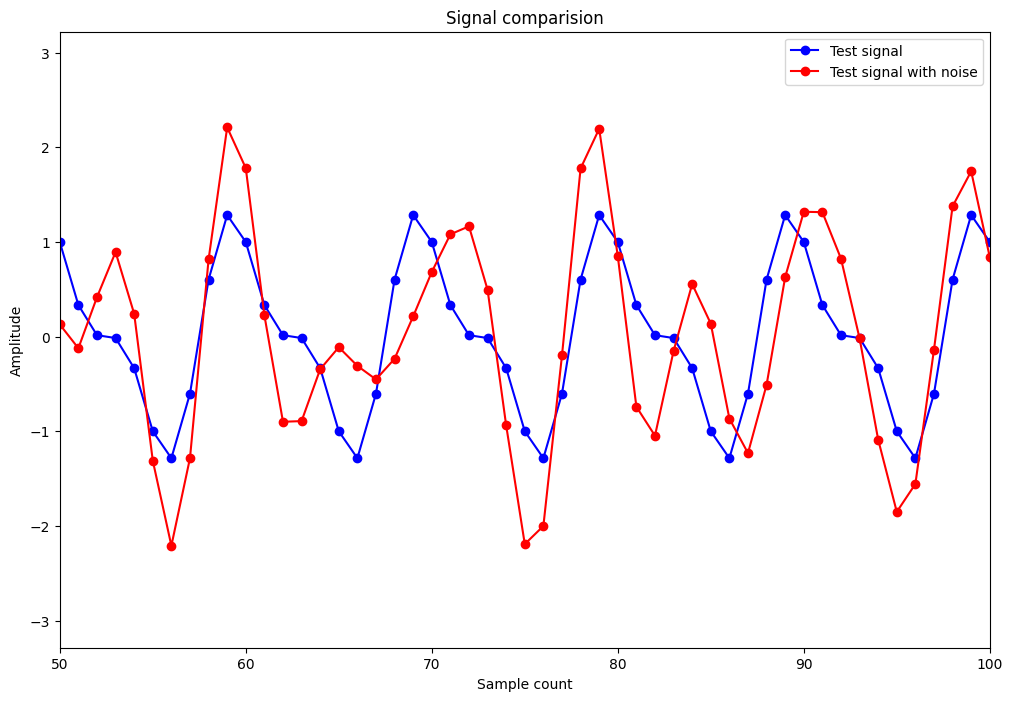

In [3]:
fig, axes = plt.subplots(1, 1, figsize=(12,8))
ax = axes
ax.plot(signal, 'bo-', label='Test signal')
ax.plot(noisySignal, 'ro-', label='Test signal with noise')
ax.set_xlabel('Sample count')
ax.set_ylabel('Amplitude')
ax.set_title("Signal comparision")
ax.set_xlim(50, 100)

plt.legend()
plt.show()

##### Choosing our IIR filter

Let's use a 10th order Chebyshev bandstop filter to filter out the bandlimited noise in the test signal.
Since it's a 10th order, the rolloff is steep! The Chebyshev filter is a class of analog biquad filter design with a pass band ripple which introduces non-linear phase in the pass band as well as the stop band. 

Let's look at the frequency and phase responses of this filter

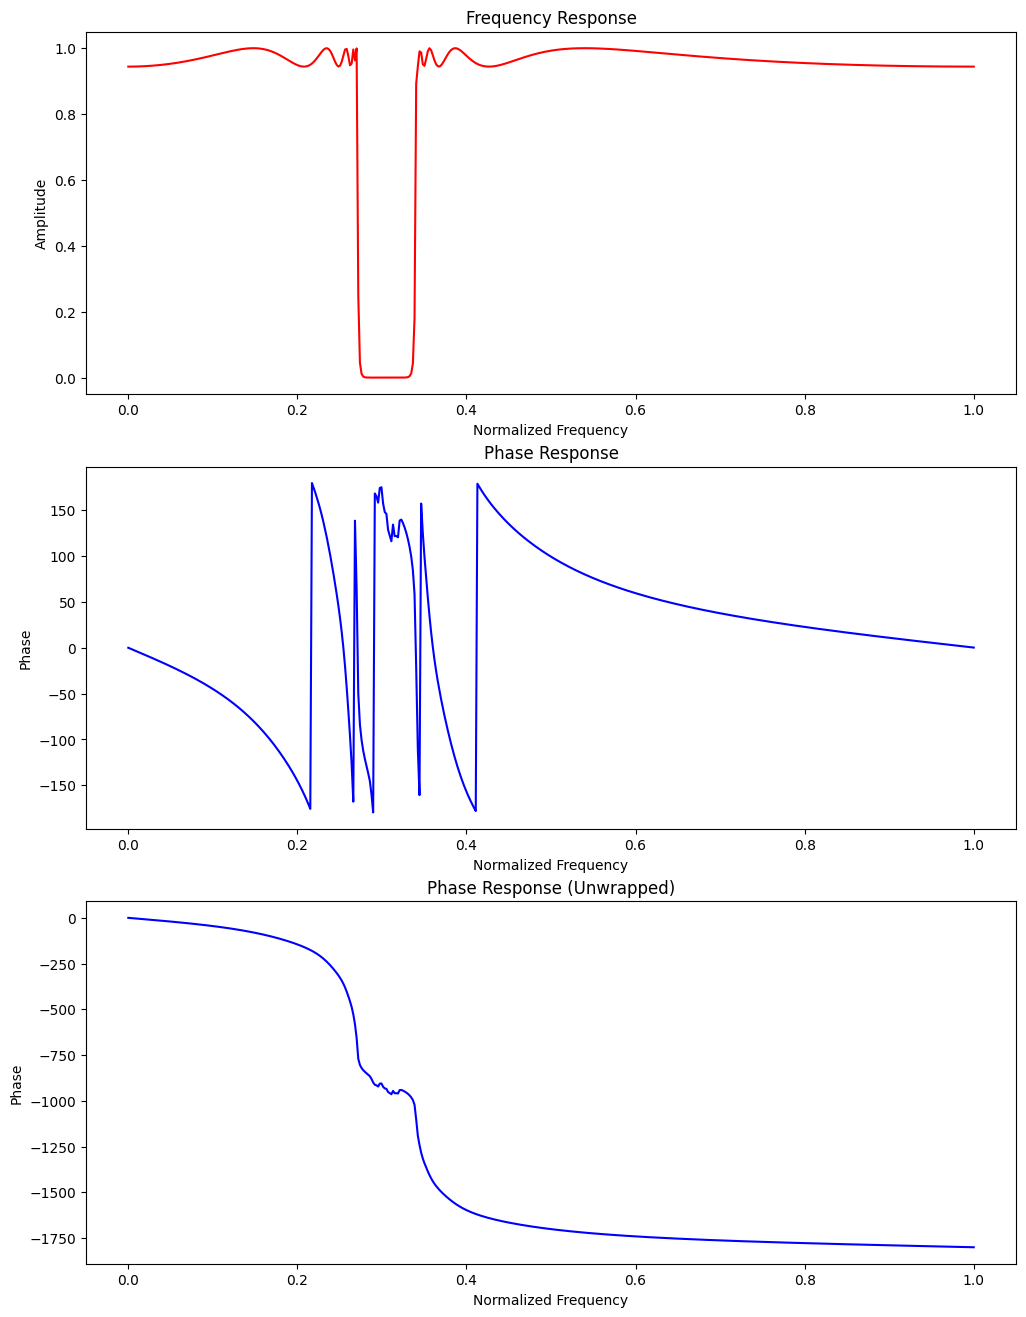

In [4]:
from scipy.signal import cheby1, freqz

b, a = cheby1(10, 0.5, [0.27, 0.34], 'stop')
w, H = freqz(b, a)

# Examine the magnitude and phase response of the IIR filter
fig, axes = plt.subplots(3, 1, figsize=(12,16))
x = np.linspace(0, 1, H.size)
y = np.abs(H)

ax = axes[0]
ax.plot(x, y, 'r-')
ax.set_xlabel('Normalized Frequency')
ax.set_ylabel('Amplitude')
ax.set_title("Frequency Response")

ax = axes[1]
y = np.degrees(np.angle(H))
ax.plot(x, y, 'b-')
ax.set_xlabel('Normalized Frequency')
ax.set_ylabel('Phase')
ax.set_title("Phase Response")

ax = axes[2]
y = np.degrees(np.unwrap(np.angle(H)))
ax.plot(x, y, 'b-')
ax.set_xlabel('Normalized Frequency')
ax.set_ylabel('Phase')
ax.set_title("Phase Response (Unwrapped)")

plt.show()

##### Pass the signal through an IIR Filter

Observe the time domain characteristics of the filtered signal.

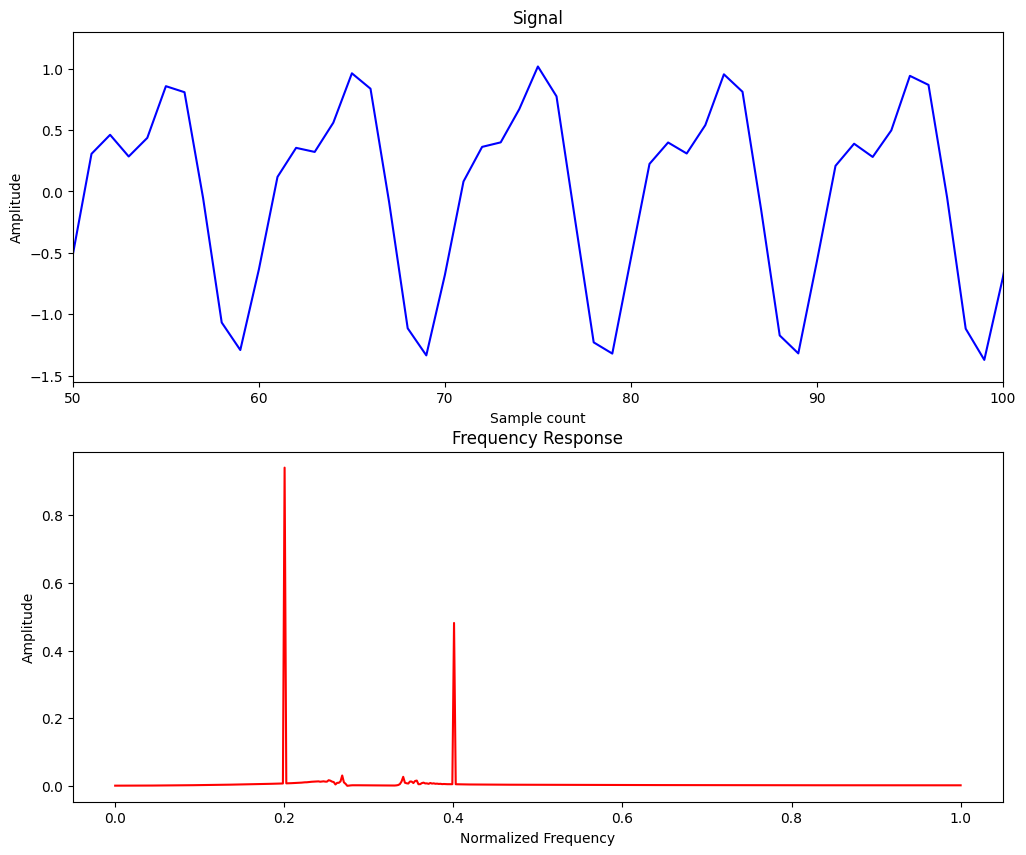

In [5]:
b, a = cheby1(10, 0.5, [0.27, 0.34], 'stop')
filteredSignal = lfilter(b, a, noisySignal)

fig, axes = plt.subplots(2, 1, figsize=(12,10))
ax = axes[0]
ax.plot(filteredSignal, 'b-')
ax.set_xlabel('Sample count')
ax.set_ylabel('Amplitude')
ax.set_title("Signal")
ax.set_xlim(50, 100)

# Generate the FFT spectrum to plot the frequency response
spectrum = fft(filteredSignal)

ax = axes[1]
x = np.linspace(0, 1, spectrum.size//2)
y = (np.abs(spectrum)/(spectrum.size/2))[:spectrum.size//2]    
ax.plot(x, y, 'r-')
ax.set_xlabel('Normalized Frequency')
ax.set_ylabel('Amplitude')
ax.set_title("Frequency Response")

plt.show()

The IIR Filter has changed the time domain characteristics of the test signal.

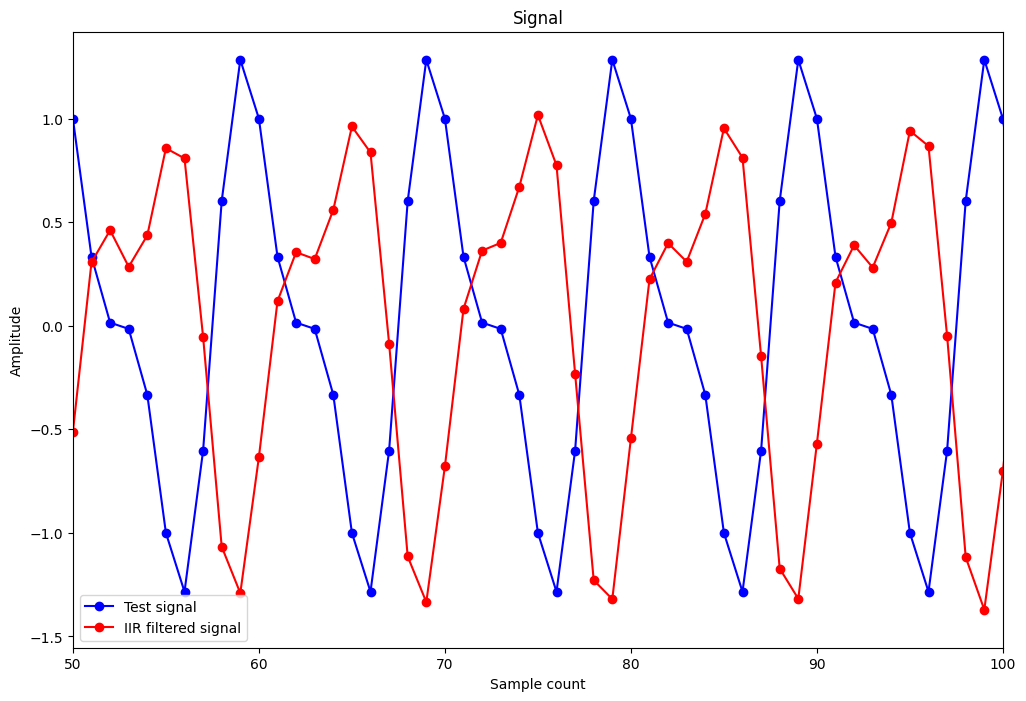

In [6]:
fig, axes = plt.subplots(1, 1, figsize=(12,8))
ax = axes
ax.plot(signal, 'bo-', label='Test signal')
ax.plot(filteredSignal, 'ro-', label='IIR filtered signal')
ax.set_xlabel('Sample count')
ax.set_ylabel('Amplitude')
ax.set_title("Signal")
ax.set_xlim(50, 100)

plt.legend()
plt.show()

##### Choosing our FIR filter

Let's use a 101 tap bandstop FIR filter to remove the bandlimited noise in the test signal.
This filter is designed using the window method. The coefficients generated are of a symmetric impulse response of 101 samples.

Let's look at the frequency and phase responses of this filter

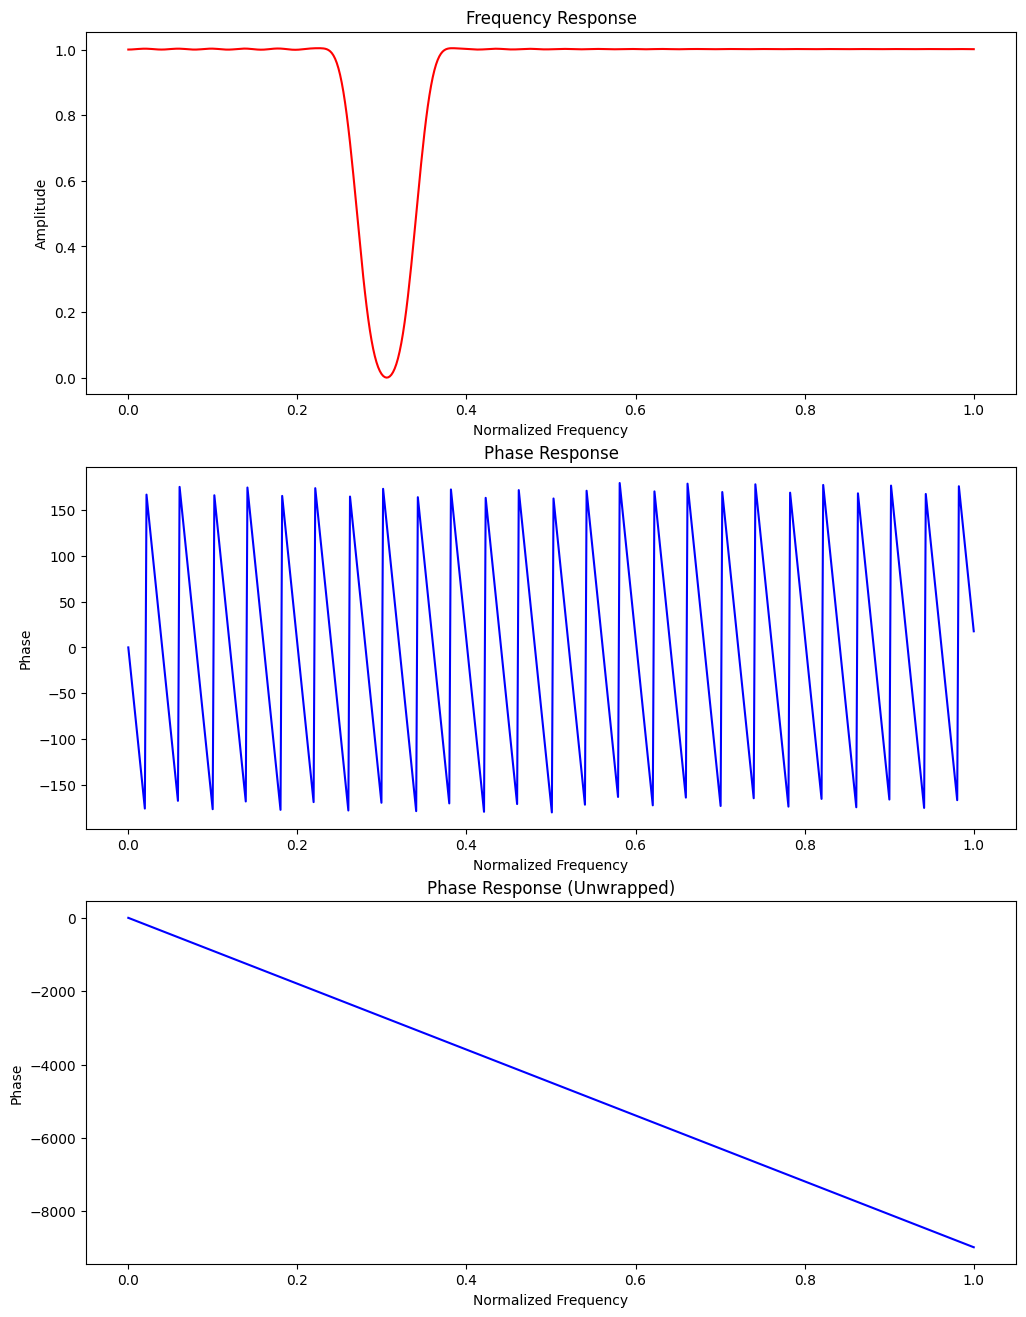

In [11]:
from scipy.signal import firwin, lfilter

a = firwin(101, [0.27, 0.34], pass_zero='bandstop')
b = np.array([1])
w, H = freqz(a, b)

# Examine the magnitude and phase response of the IIR filter
fig, axes = plt.subplots(3, 1, figsize=(12,16))
x = np.linspace(0, 1, H.size)
y = np.abs(H)

ax = axes[0]
ax.plot(x, y, 'r-')
ax.set_xlabel('Normalized Frequency')
ax.set_ylabel('Amplitude')
ax.set_title("Frequency Response")

ax = axes[1]
y = np.degrees(np.angle(H))
ax.plot(x, y, 'b-')
ax.set_xlabel('Normalized Frequency')
ax.set_ylabel('Phase')
ax.set_title("Phase Response")

ax = axes[2]
y = np.degrees(np.unwrap(np.angle(H)))
ax.plot(x, y, 'b-')
ax.set_xlabel('Normalized Frequency')
ax.set_ylabel('Phase')
ax.set_title("Phase Response (Unwrapped)")

plt.show()

##### Pass the signal through an FIR Filter

Observe the time domain characteristics of the filtered signal.

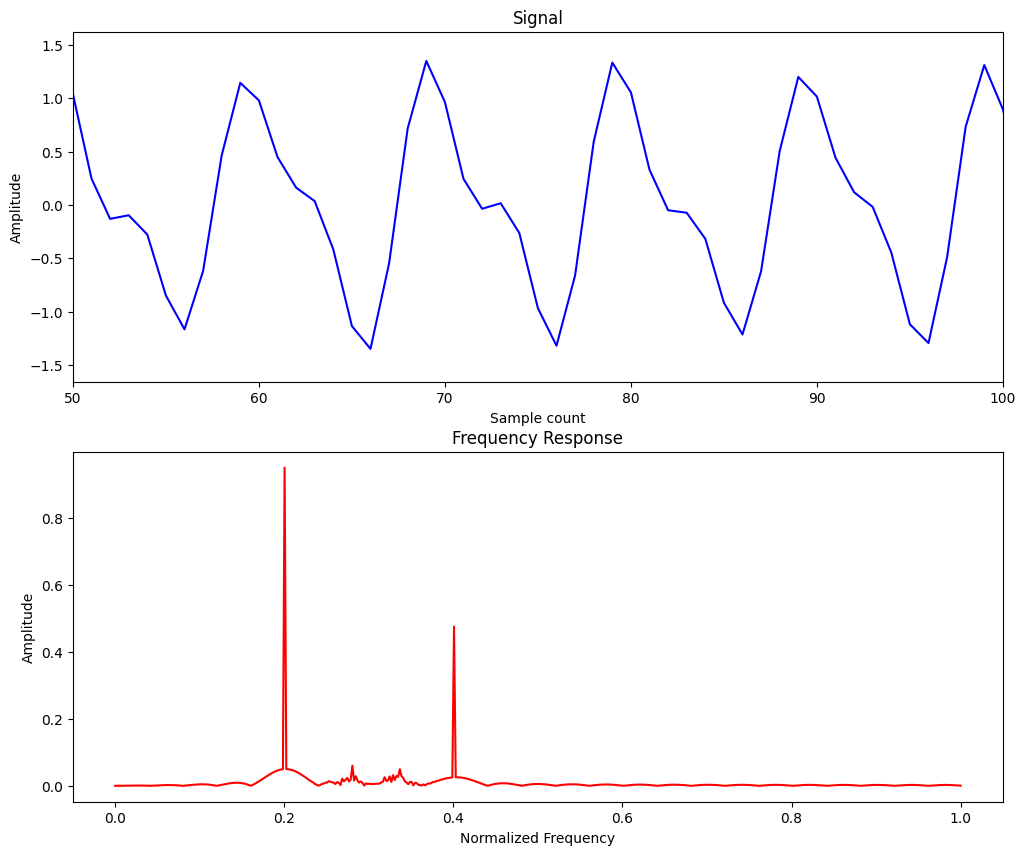

In [12]:
a = firwin(101, [0.27, 0.34], pass_zero='bandstop')
b = np.array([1])
filteredSignal = lfilter(a, b, noisySignal)

fig, axes = plt.subplots(2, 1, figsize=(12,10))
ax = axes[0]
ax.plot(filteredSignal, 'b-')
ax.set_xlabel('Sample count')
ax.set_ylabel('Amplitude')
ax.set_title("Signal")
ax.set_xlim(50, 100)

# Generate the FFT spectrum to plot the frequency response
spectrum = fft(filteredSignal)

ax = axes[1]
x = np.linspace(0, 1, spectrum.size//2)
y = (np.abs(spectrum)/(spectrum.size/2))[:spectrum.size//2]    
ax.plot(x, y, 'r-')
ax.set_xlabel('Normalized Frequency')
ax.set_ylabel('Amplitude')
ax.set_title("Frequency Response")

plt.show()

##### The FIR filter exhibits linear phase behavior
The FIR Filter has preserved the time domain characteristics of the test signal.

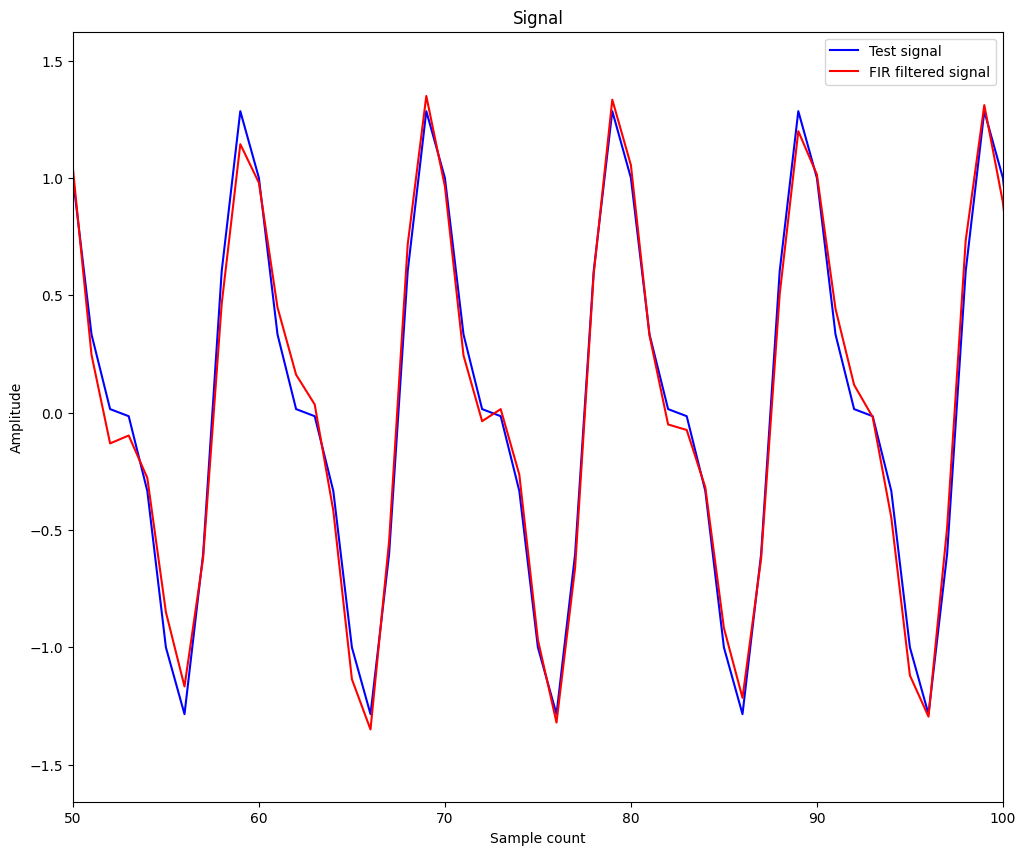

In [13]:
fig, axes = plt.subplots(1, 1, figsize=(12,10))
ax = axes
ax.plot(signal, 'b-', label='Test signal')
ax.plot(filteredSignal, 'r-', label='FIR filtered signal')
ax.set_xlabel('Sample count')
ax.set_ylabel('Amplitude')
ax.set_title("Signal")
ax.set_xlim(50, 100)

plt.legend()
plt.show()

##### Impulse responses of the 2 filters used
We can see that the impulse response of the IIR filter is a damped oscillation. On the other hand, the impulse response of the FIR filter is symmetric about it's center (at the 50th sample).

Generally, filters with symmetric or anti-symmetric impulse responses exhibit linear phase behavior. 

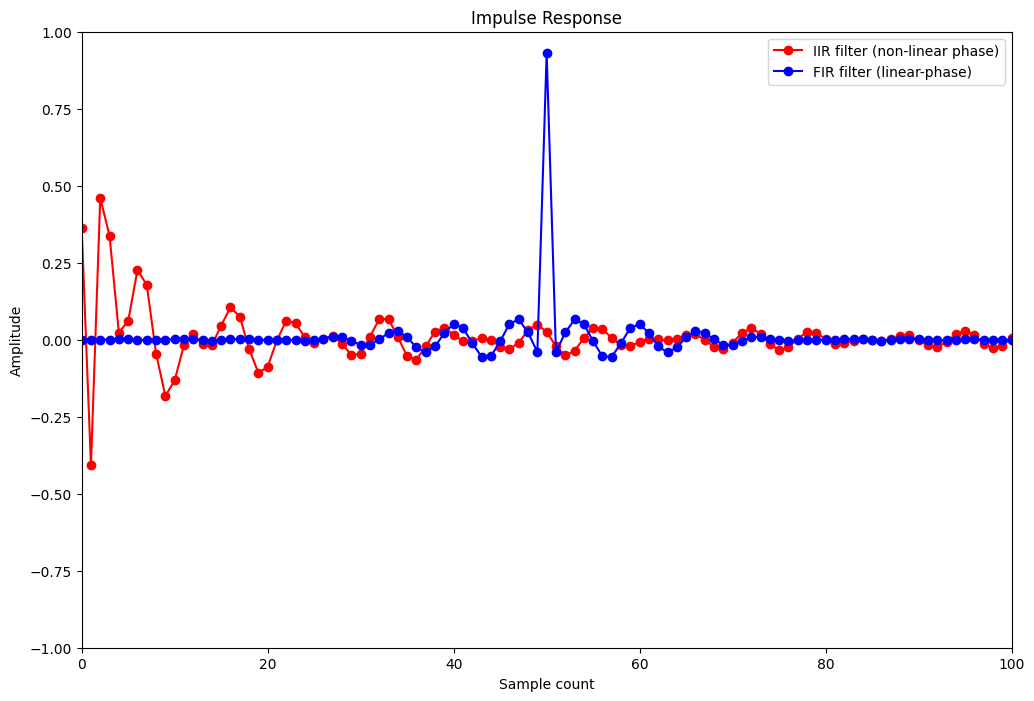

In [14]:
impulse = np.zeros(length)
impulse[0] = 1;

b, a = cheby1(10, 0.5, [0.27, 0.34], 'stop')
iirImpulseResponse = lfilter(b, a, impulse)

a = firwin(101, [0.27, 0.34], pass_zero='bandstop')
b = np.array([1])
firImpulseResponse = lfilter(a, b, impulse)

fig, axes = plt.subplots(1, 1, figsize=(12,8))
ax = axes
ax.plot(iirImpulseResponse, 'ro-', label='IIR filter (non-linear phase)')
ax.plot(firImpulseResponse, 'bo-', label='FIR filter (linear-phase)')
ax.set_xlabel('Sample count')
ax.set_ylabel('Amplitude')
ax.set_title("Impulse Response")
ax.set_xlim(0, 100)
ax.set_ylim(-1, 1)

plt.legend()
plt.show()

In [ ]:
from scipy.signal import firwin2
impulse = np.zeros(length)
impulse[0] = 1;

b, a = butter(10, 0.27, 'highpass')
iirImpulseResponse = lfilter(b, a, impulse)

#a = firwin(101, [0.27, 0.34], pass_zero='bandstop')
a = firwin2(101, [0, 0.1, 0.25, 0.28, 0.34, 0.38, 0.9, 1], [0, 1, 1, 0, 0, 1, 1, 0], antisymmetric=False)
b = np.array([1])
firImpulseResponse = lfilter(a, b, impulse)

fig, axes = plt.subplots(1, 1, figsize=(12,6))
ax = axes
ax.plot(iirImpulseResponse, 'ro-')
ax.grid(axis='both')
plt.xticks(np.arange(0, 100, 10))
ax.set_xlabel('Sample count')
ax.set_ylabel('Amplitude')
ax.set_xlim(0, 100)
ax.set_ylim(-1, 1)

plt.show()